In [340]:
from sklearn import tree
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [341]:
df_prediction = pd.read_csv('credit_card_churn.csv')
df_classifier = pd.read_csv('credit_card_churn.csv')

In [342]:
df_prediction = df_prediction.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)
df_classifier = df_classifier.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [343]:
df_prediction.Attrition_Flag = df_prediction.Attrition_Flag.map({'Existing Customer': 0, 'Attrited Customer': 1})
df_prediction.Gender = df_prediction.Gender.map({'M': 0, 'F': 1})
df_prediction.Education_Level = df_prediction.Education_Level.map({'High School': 0, 'Graduate': 1, 'Uneducated': 2, 'Unknown': 3, 'College': 4,
    'Post-Graduate': 5, 'Doctorate': 6})
df_prediction.Marital_Status = df_prediction.Marital_Status.map({'Married': 0, 'Single': 1, 'Unknown': 2, 'Divorced': 3})
df_prediction.Income_Category = df_prediction.Income_Category.map({'$60K - $80K': 0, 'Less than $40K': 1, '$80K - $120K': 2, '$40K - $60K': 3, '$120K +': 4, 'Unknown': 5})
df_prediction.Card_Category = df_prediction.Card_Category.map({'Blue': 0, 'Gold': 1, 'Silver': 2, 'Platinum': 3})

df_classifier.Attrition_Flag = df_classifier.Attrition_Flag.map({'Existing Customer': 0, 'Attrited Customer': 1})
df_classifier.Gender = df_classifier.Gender.map({'M': 0, 'F': 1})
df_classifier.Education_Level = df_classifier.Education_Level.map({'High School': 0, 'Graduate': 1, 'Uneducated': 2, 'Unknown': 3, 'College': 4,
    'Post-Graduate': 5, 'Doctorate': 6})
df_classifier.Marital_Status = df_classifier.Marital_Status.map({'Married': 0, 'Single': 1, 'Unknown': 2, 'Divorced': 3})
df_classifier.Income_Category = df_classifier.Income_Category.map({'$60K - $80K': 0, 'Less than $40K': 1, '$80K - $120K': 2, '$40K - $60K': 3, '$120K +': 4, 'Unknown': 5})
df_classifier.Card_Category = df_classifier.Card_Category.map({'Blue': 0, 'Gold': 1, 'Silver': 2, 'Platinum': 3})


In [344]:
df_prediction.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level   
0               0            45       0                3                0  \
1               0            49       1                5                1   
2               0            51       0                3                1   
3               0            40       1                4                0   
4               0            40       0                3                2   

   Marital_Status  Income_Category  Card_Category  Months_on_book   
0               0                0              0              39  \
1               1                1              0              44   
2               0                2              0              36   
3               2                1              0              34   
4               0                0              0              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon   
0                         5                       1                      3  \
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1   
0       12691.0                  777          11914.0                 1.335  \
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [345]:
df_prediction.describe()

Attrition_Flag  Customer_Age        Gender  Dependent_count   
count    10127.000000  10127.000000  10127.000000     10127.000000  \
mean         0.160660     46.325960      0.529081         2.346203   
std          0.367235      8.016814      0.499178         1.298908   
min          0.000000     26.000000      0.000000         0.000000   
25%          0.000000     41.000000      0.000000         1.000000   
50%          0.000000     46.000000      1.000000         2.000000   
75%          0.000000     52.000000      1.000000         3.000000   
max          1.000000     73.000000      1.000000         5.000000   

       Education_Level  Marital_Status  Income_Category  Card_Category   
count     10127.000000    10127.000000     10127.000000   10127.000000  \
mean          1.974622        0.758862         2.021230       0.126987   
std           1.680730        0.879864         1.535363       0.482019   
min           0.000000        0.000000         0.000000       0.000000   
25%           1.000000        0.000000         1.000000       0.000000   
50%           1.000000        1.000000         2.000000       0.000000   
75%           3.000000        1.000000         3.000000       0.000000   
max           6.000000        3.000000         5.000000       3.000000   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon   
count    10127.000000              10127.000000            10127.000000  \
mean        35.928409                  3.812580                2.341167   
std          7.986416                  1.554408                1.010622   
min         13.000000                  1.000000                0.000000   
25%         31.000000                  3.000000                2.000000   
50%         36.000000                  4.000000                2.000000   
75%         40.000000                  5.000000                3.000000   
max         56.000000                  6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal   
count           10127.000000  10127.000000         10127.000000  \
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct   
count     10127.000000          10127.000000     10127.000000    10127.000000  \
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [346]:
linear = linear_model.LinearRegression()
tree = tree.DecisionTreeClassifier()

In [347]:
corr = df_prediction.corr()
corr.style.background_gradient()


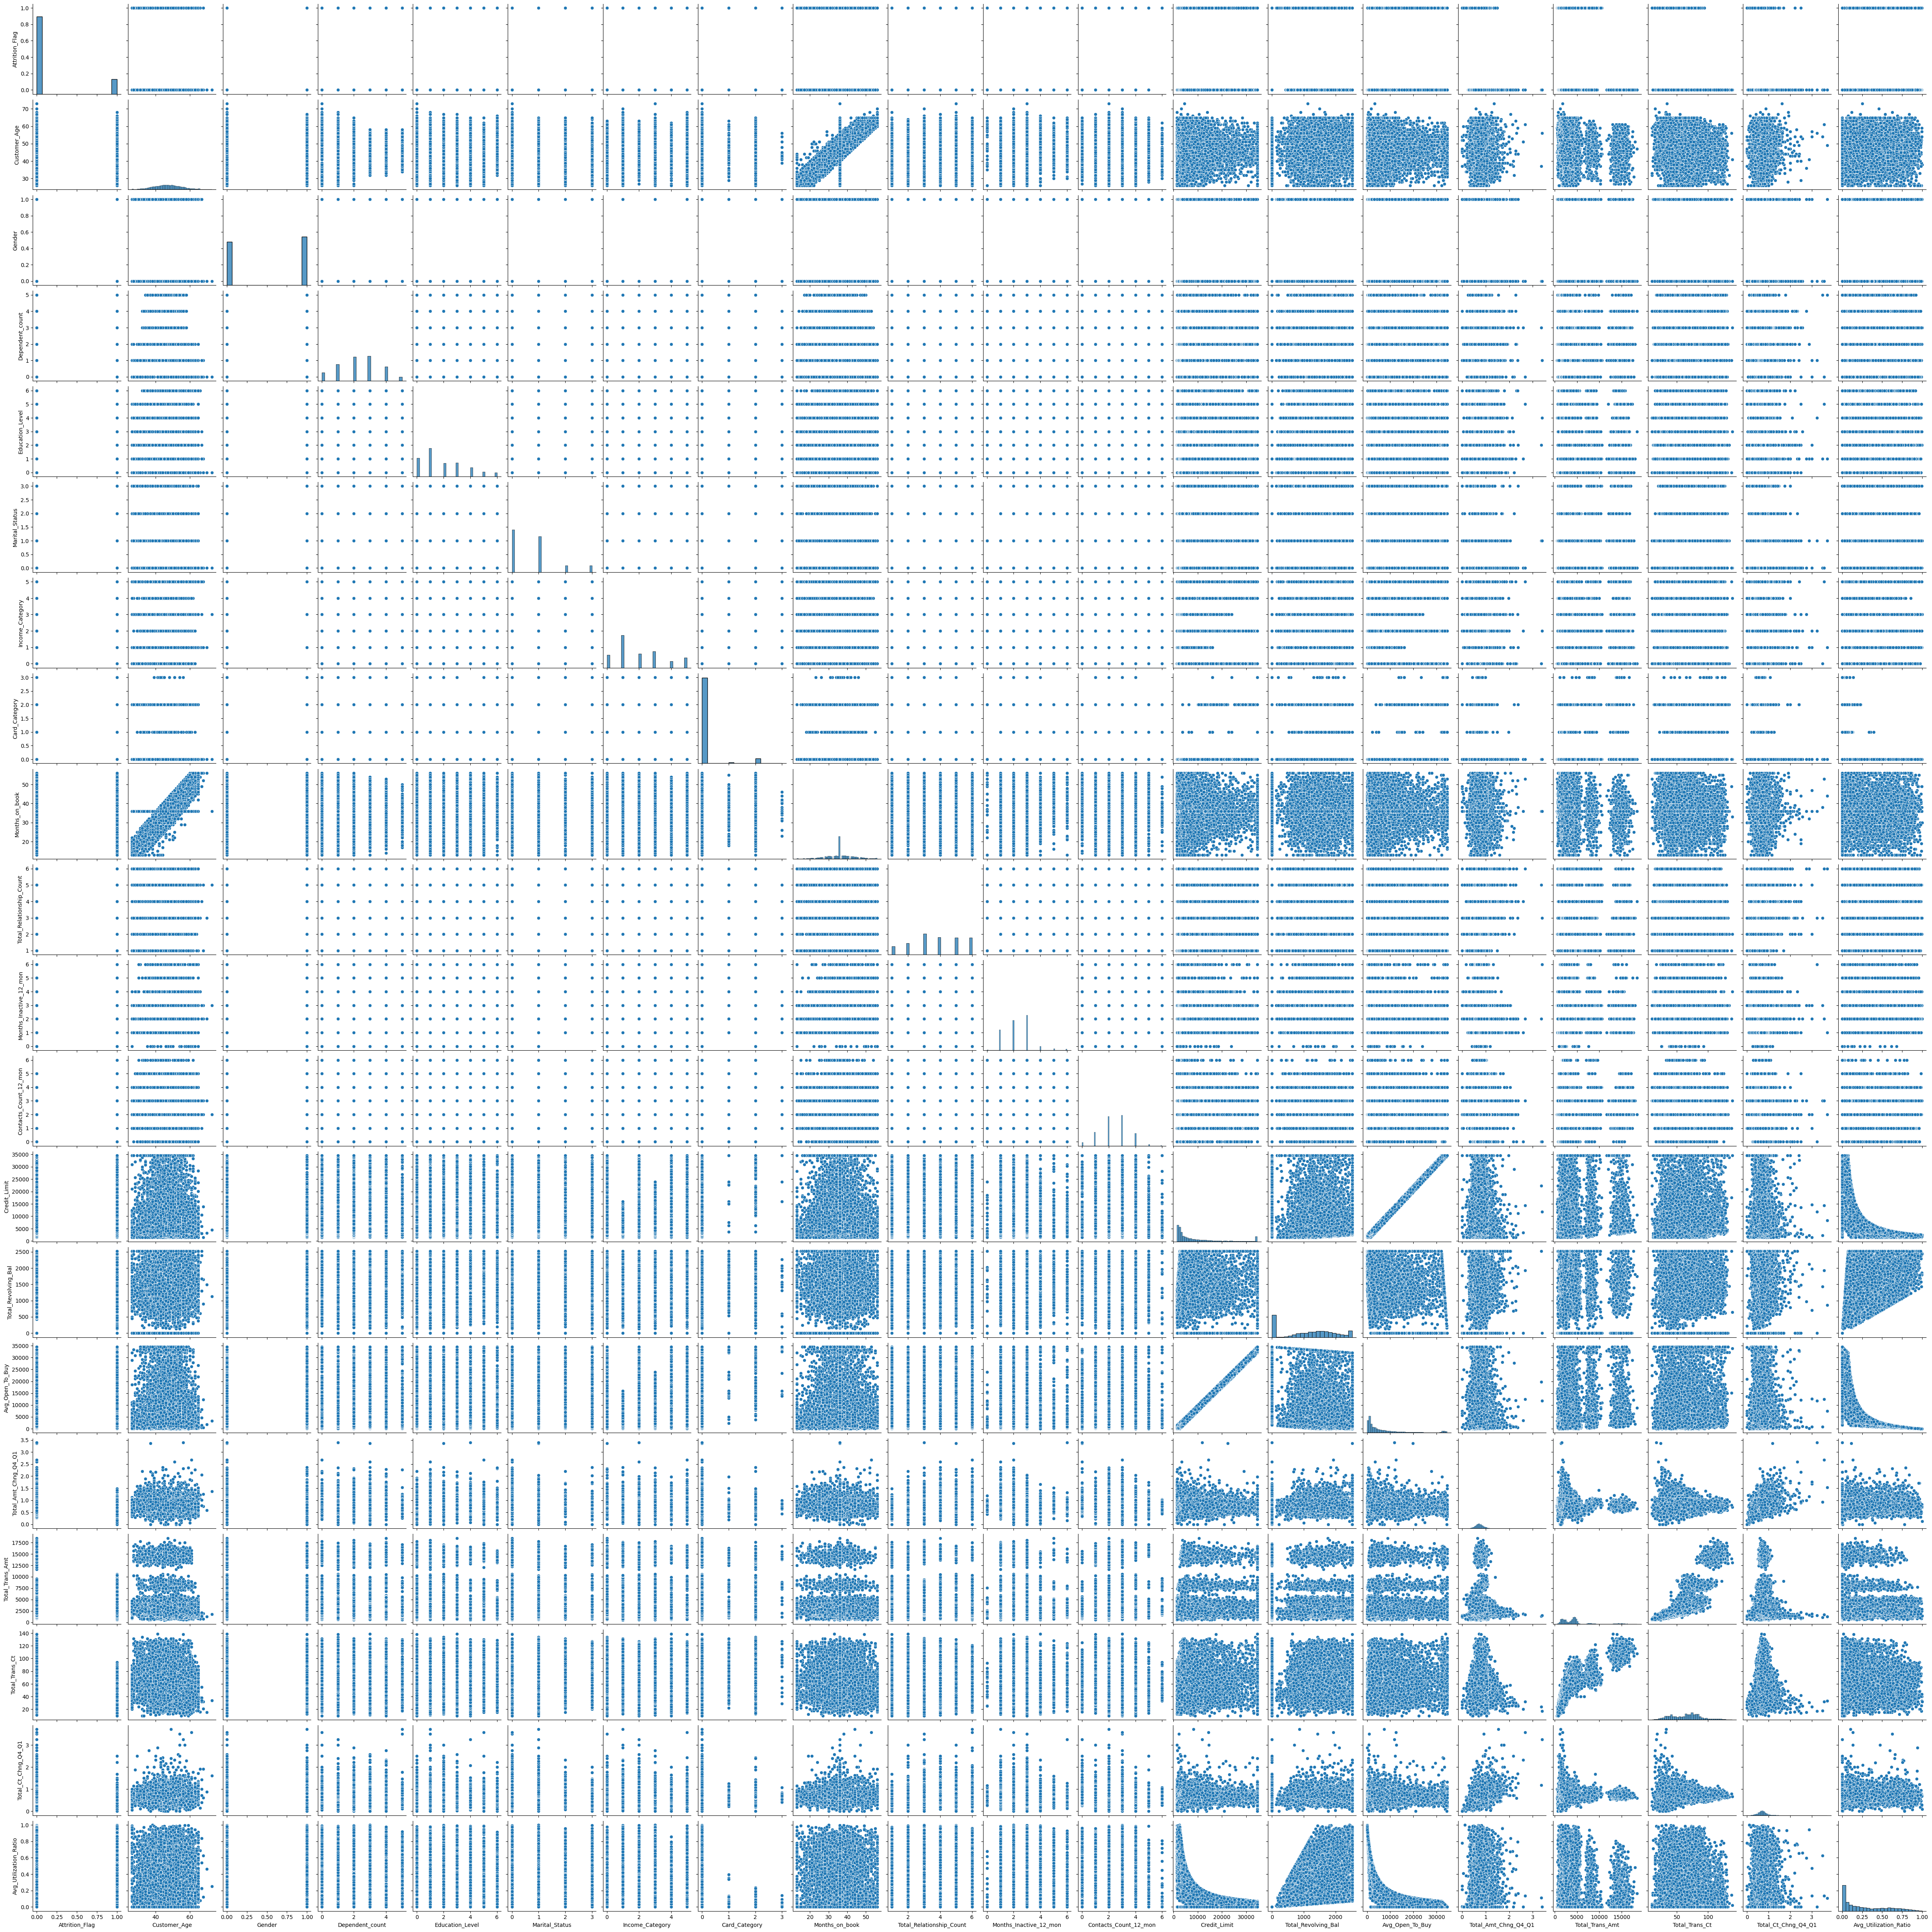

In [348]:
sb.pairplot(df_classifier)

In [402]:
data_x_prediction = df_prediction.drop('Credit_Limit', axis=1)
data_y_prediction = df_prediction.Credit_Limit

data_x_classifier = df_classifier.drop('Card_Category', axis=1)
data_y_classifier = df_classifier.Card_Category

In [403]:
train_x_prediction, test_x_prediction, train_y_prediction, test_y_prediction = train_test_split(data_x_prediction, data_y_prediction, train_size=0.1) 

train_x_classifier, test_x_classifier, train_y_classifier, test_y_classifier = train_test_split(data_x_classifier, data_y_classifier, train_size=0.1) 


In [404]:
linear.fit(train_x_prediction, train_y_prediction)
tree.fit(train_x_classifier, train_y_classifier)

DecisionTreeClassifier()

In [405]:
print(f'Score Modelo Predictivo: {round(linear.score(test_x_prediction, test_y_prediction),2)*100}%')
print(f'Score Modelo Clasificatorio: {round(tree.score(test_x_classifier, test_y_classifier), 2)*100}%')

Score Modelo Predictivo: 100.0%
Score Modelo Clasificatorio: 94.0%


In [406]:
df_prediction.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level   
0               0            45       0                3                0  \
1               0            49       1                5                1   
2               0            51       0                3                1   
3               0            40       1                4                0   
4               0            40       0                3                2   

   Marital_Status  Income_Category  Card_Category  Months_on_book   
0               0                0              0              39  \
1               1                1              0              44   
2               0                2              0              36   
3               2                1              0              34   
4               0                0              0              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon   
0                         5                       1                      3  \
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1   
0       12691.0                  777          11914.0                 1.335  \
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [411]:
label_Attrition_Flag = {'0': 'Existing Customer', 1 : 'Attrited Customer'}
label_Gender = {0: 'Masculino', 1: 'Femenino'}
label_Education_Level = {0: 'Primaria', 1: 'Graduado', 2: 'Sin Educacion', 3: 'Desconocida', 4: 'Universitaria',5: 'Post-Grado', 6: 'Doctorado'}
label_Marital_Status = {0: 'Casado(a)', 1: 'Soltero(a)', 2: 'Desconocido', 3: 'Divorciado(a)'}
label_Income_Category = {0: '$60K - $80K', 1: 'Menos de $40K', 2: '$80K - $120K', 3: '$40K - $60K', 4: '$120K +', 5: 'Desconocido'}
label_Card_Category = {0: 'Azul', 1: 'Oro', 2: 'Plata', 3: 'Platino'}

a_flag = 0
c_age = 43
gender = 0
dep_count = 3
ed_level = 1
mar_status = 1
in_cat = 2
card_cat = 0
month_ob = 29
t_rel_count = 4
month_in = 2
contact_count = 2
total_rev_bal = 741
avg_open_buy = 6204
Total_Amt_Chng_Q4_Q1 = 1.405
Total_Trans_Amt = 1291
Total_Trans_Ct = 28
Total_Ct_Chng_Q4_Q1 = 2.333
Avg_Utilization_Ratio = 0.061

print(f'Un cliente de edad {c_age}, de genero {label_Gender[gender]}, de estado marital {label_Marital_Status[mar_status]}, con un ingreso de {label_Income_Category[in_cat]}, tendra un limite de creditos de: {linear.predict([a_flag, c_age, gender, dep_count, ed_level, mar_status, in_cat, card_cat, month_ob, t_rel_count, month_in, contact_count, total_rev_bal, avg_open_buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio])}')


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0.000e+00 4.300e+01 0.000e+00 3.000e+00 1.000e+00 1.000e+00 2.000e+00
 0.000e+00 2.900e+01 4.000e+00 2.000e+00 2.000e+00 7.410e+02 6.204e+03
 1.405e+00 1.291e+03 2.800e+01 2.333e+00 6.100e-02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.